# Machine Learning Assignment 1_6

# 2.1. Problem Statement: Machine Learning 1

### 1. What are the three stages to build the hypotheses or model in machine learning?

#### Ans.: (a) Model building, (b) Model testing, (c) Applying the model

### 2. What is the standard approach to supervised learning?

#### Ans.: The standard approach to supervised learning is to split the set of example into the training set and the test.

### 3. What is Training set and Test set?

#### Ans.:Training set-In various areas of information science like machine learning, a set of data is used to discover the potentially predictive relationship known as 'Training Set'. Training set is an examples given to the learner.
#### Test Set – The test set is a dataset used to measure how well the model performs at making predictions on that test set. If the prediction scores for the test set are unreasonable, we’ll have to make some adjustments to our model and try again.

### 4. What is the general principle of an ensemble method and what is bagging and boosting in ensemble method?

#### Ans.: Ensemble methods, which combines several model to produce better predictive performance than utilizing a single model. The main principle behind the ensemble model is that a group of weak learners come together to form a strong learner.
#### Bootstrap aggregating, also called bagging is a method in ensemble for improving unstable estimation or classification schemes. Bagging can reduce errors by reducing the variance term.
#### Boosting method are used sequentially to reduce the bias of the combined model. Boosting can reduce errors by reducing the variance term.

### 5. How can you avoid overfitting ?

#### Ans.: By using a lot of data overfitting can be avoided, overfitting happens relatively as you have a small dataset, and you try to learn from it. But if you have a small database and you are forced to come with a model based on that. In such situation, you can use a technique known as cross validation. In this method the dataset splits into two section, testing and training datasets, the testing dataset will only test the model while, in training dataset, the data points will come up with the model.

#### In this technique, a model is usually given a dataset of a known data on which training (training data set) is run and a dataset of unknown data against which the model is tested. The idea of cross validation is to define a dataset to “test” the model in the training phase.

# 2.2. Problem Statement: Machine Learning 2

### Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

Here is the code to load the data:

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
import seaborn as sns
#Find column names & target data
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# Assign column name
bos.columns = boston.feature_names
bos.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [6]:
# Assign Target
bos["TRGT"] = boston.target
bos.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TRGT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [7]:
# Check if there are any null values in data
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
TRGT       0
dtype: int64

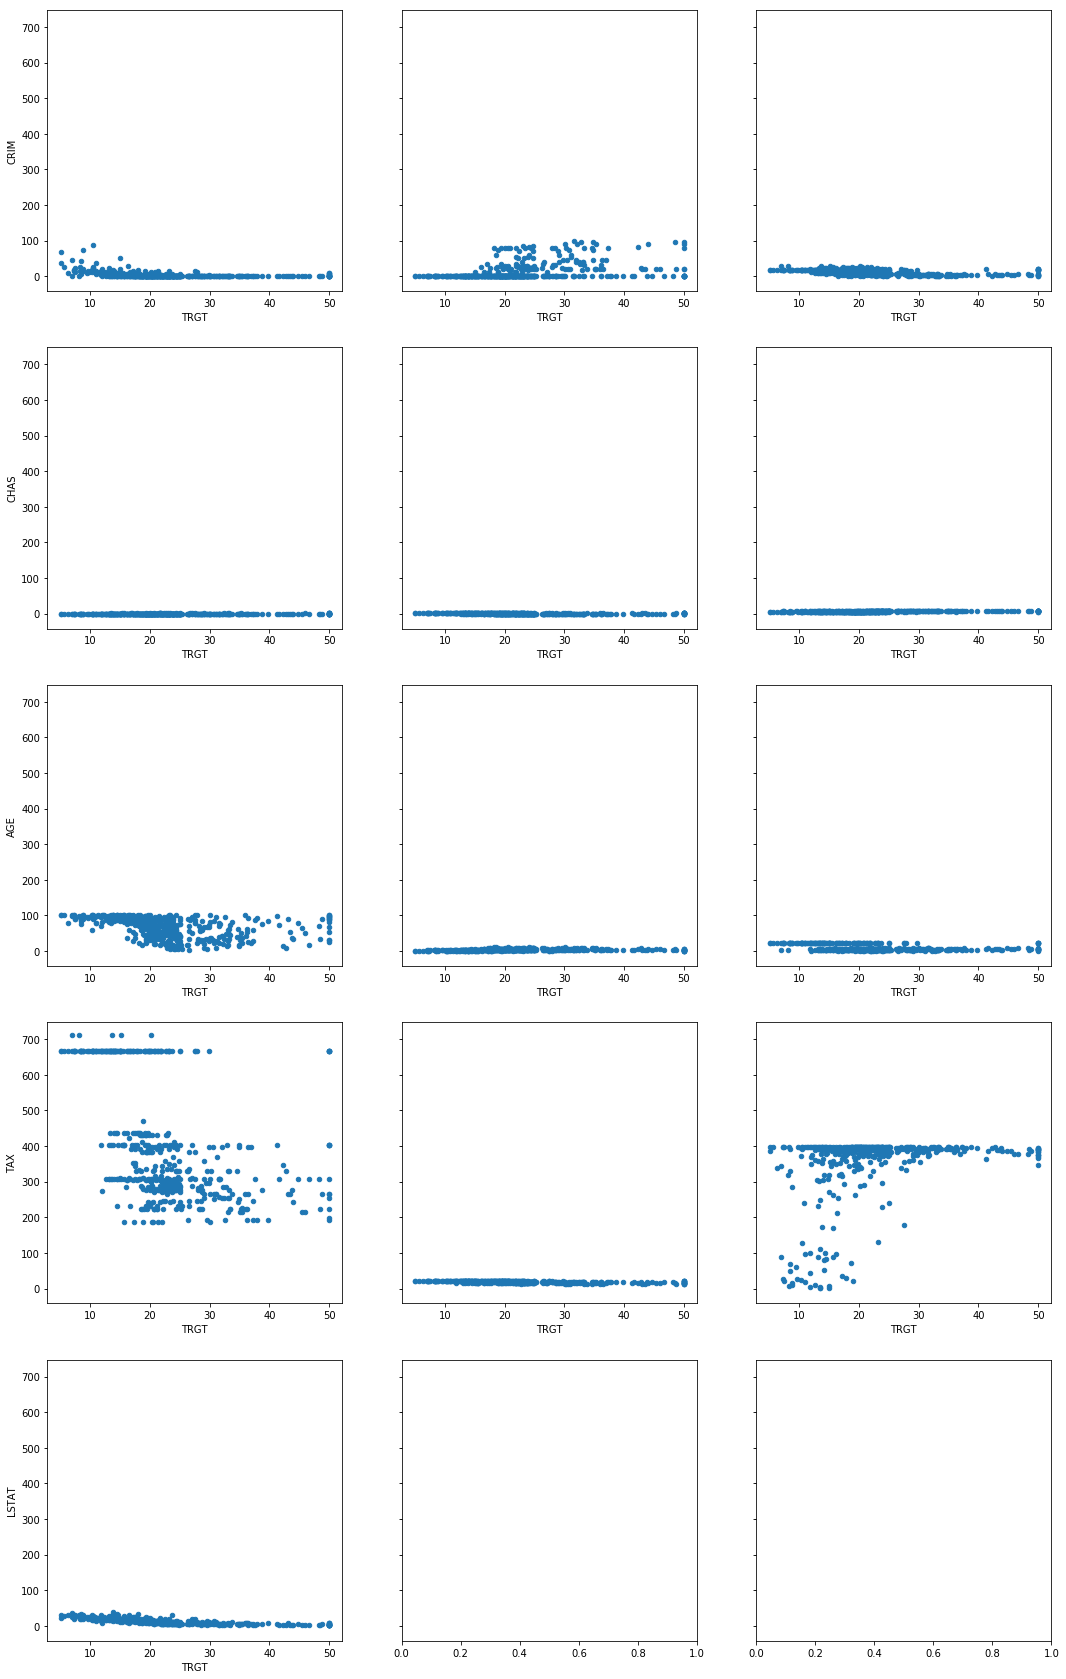

In [8]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(5,3,sharey=True)
bos.plot(kind='scatter', x='TRGT', y='CRIM', ax=axs[0][0], figsize=(18, 30))
bos.plot(kind='scatter', x='TRGT', y='ZN', ax=axs[0][1])
bos.plot(kind='scatter', x='TRGT', y='INDUS', ax=axs[0][2])
bos.plot(kind='scatter', x='TRGT', y='CHAS', ax=axs[1][0])
bos.plot(kind='scatter', x='TRGT', y='NOX', ax=axs[1][1])
bos.plot(kind='scatter', x='TRGT', y='RM', ax=axs[1][2])
bos.plot(kind='scatter', x='TRGT', y='AGE', ax=axs[2][0])
bos.plot(kind='scatter', x='TRGT', y='DIS', ax=axs[2][1])
bos.plot(kind='scatter', x='TRGT', y='RAD', ax=axs[2][2])
bos.plot(kind='scatter', x='TRGT', y='TAX', ax=axs[3][0])
bos.plot(kind='scatter', x='TRGT', y='PTRATIO', ax=axs[3][1])
bos.plot(kind='scatter', x='TRGT', y='B', ax=axs[3][2])
bos.plot(kind='scatter', x='TRGT', y='LSTAT', ax=axs[4][0])

In [9]:
# create X and y
feature_cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
X = bos[feature_cols]
y = bos.TRGT

In [10]:
# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

36.45948838509015
[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


In [11]:
# Confidence in our model
import statsmodels.formula.api as smf
lm = smf.ols(formula='TRGT ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT', data=bos).fit()
lm.conf_int()

,0,1
Intercept,26.432226,46.486751
CRIM,-0.172584,-0.043438
ZN,0.019449,0.073392
INDUS,-0.100268,0.141385
CHAS,0.993904,4.379563
NOX,-25.271634,-10.261589
RM,2.988727,4.631004
AGE,-0.025262,0.026647
DIS,-1.867455,-1.083679
RAD,0.175692,0.436407


In [12]:
lm.pvalues

Intercept    3.283438e-12
CRIM         1.086810e-03
ZN           7.781097e-04
INDUS        7.382881e-01
CHAS         1.925030e-03
NOX          4.245644e-06
RM           1.979441e-18
AGE          9.582293e-01
DIS          6.013491e-13
RAD          5.070529e-06
TAX          1.111637e-03
PTRATIO      1.308835e-12
B            5.728592e-04
LSTAT        7.776912e-23
dtype: float64

In [13]:
lm.rsquared

0.7406426641094095

In [14]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   TRGT   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 18 Nov 2019   Prob (F-statistic):          6.72e-135
Time:                        19:00:58   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Train test split

In [15]:
from sklearn.model_selection import train_test_split
(x_train,x_test,y_train,y_test) = train_test_split(X,y,test_size=0.3,random_state = 0)

In [16]:
[x_train.shape, y_train.shape,x_test.shape, y_test.shape]

[(354, 13), (354,), (152, 13), (152,)]

In [17]:
# fit model
lm1 = LinearRegression()
lm1.fit(x_train,y_train)
predTrain = lm1.predict(x_train)

In [18]:
# predictions = lm.predict(X_test)
predTest = lm1.predict(x_test)
predTest[0:5]

array([24.9357079 , 23.75163164, 29.32638296, 11.97534566, 21.37272478])

In [19]:
lm1.score(x_test,y_test)

0.6733825506400175

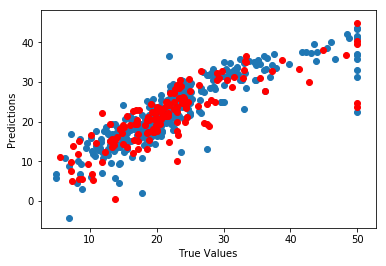

In [20]:
plt.scatter(y_train, predTrain)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.scatter(y_test, predTest, color='red')

# 2.3. Problem Statement: Machine Learning 3
I decided to treat this as a classification problem by creating a new binary
variable affair (did the woman have at least one affair?) and trying to
predict the classification for each woman.
Dataset
The dataset I chose is the affairs dataset that comes with Statsmodels. It
was derived from a survey of women in 1974 by Redbook magazine, in
which married women were asked about their participation in extramarital
affairs. More information about the study is available in a 1978 paper from
the Journal of Political Economy.
Description of Variables
The dataset contains 6366 observations of 9 variables:

rate_marriage: woman's rating of her marriage (1 = very poor, 5 =
very good)

age: woman's age

yrs_married: number of years married

children: number of children

religious: woman's rating of how religious she is (1 = not religious, 4 =
strongly religious)

educ: level of education (9 = grade school, 12 = high school, 14 =
some college, 16 = college graduate, 17 = some graduate school, 20
= advanced degree)

occupation: woman's occupation (1 = student, 2 = farming/semiskilled/
unskilled, 3 = "white collar", 4 =
teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =
professional with advanced degree)
occupation_husb: husband's occupation (same coding as above)

affairs: time spent in extra-marital affairs

Code to loading data and modules:


In [23]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score 
dta = sm.datasets.fair.load_pandas().data

In [24]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [25]:
# Check if any null values
dta.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64

In [26]:
# 2. add "affair" column: 1 represents having affairs, 0 represents not 
dta['affair'] = (dta.affairs >0).astype(int)

dta.drop('affairs',axis = 1,inplace = True)
dta.head(3)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1


In [27]:
dta['affair'].value_counts()

0    4313
1    2053
Name: affair, dtype: int64

In [28]:
dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
affair,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559


From above it's clear that the rate & years of marriage have significance on teh affairs. Higher the rate to marriage lower chances of affairs(satisfied with marriage), and as number of years increases in marriage chances of affairs increases as satisfaction from marriage lowers.

In [29]:
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
rate_marriage,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.181446


There are direct relation between age, yrs_married & number of childrens to the affairs.

Text(0, 0.5, 'Freq')

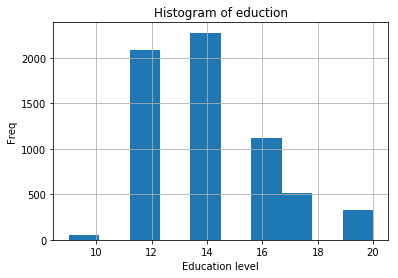

In [30]:
# Data visualization
# Histogram of Eduction
dta.educ.hist()
plt.title('Histogram of eduction')
plt.xlabel('Education level')
plt.ylabel('Freq')

In [31]:
dta["educ"].value_counts()

14.0    2277
12.0    2084
16.0    1117
17.0     510
20.0     330
9.0       48
Name: educ, dtype: int64

Text(0, 0.5, 'Freq')

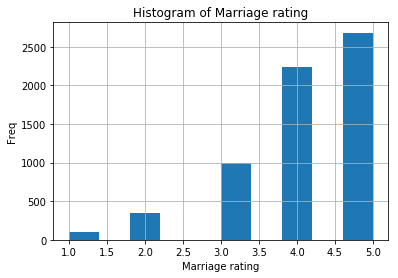

In [32]:
# Histogram of marriage rating
dta.rate_marriage.hist()
plt.title('Histogram of Marriage rating')
plt.xlabel('Marriage rating')
plt.ylabel('Freq')

Text(0, 0.5, 'Freq')

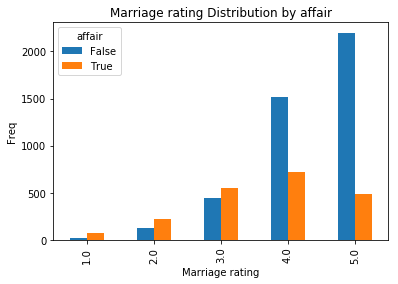

In [33]:
# Bar plot of marriage rating grouped by affair
pd.crosstab(dta.rate_marriage, dta.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage rating Distribution by affair')
plt.xlabel('Marriage rating')
plt.ylabel('Freq')

Text(0, 0.5, 'Percentage')

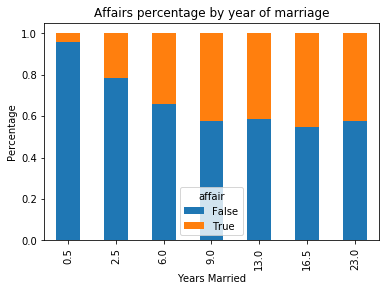

In [34]:
# Plot to see relation of number of years of marriage to affairs
yrs_affair = pd.crosstab(dta.yrs_married,dta.affair.astype(bool))
yrs_affair.div(yrs_affair.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Affairs percentage by year of marriage')
plt.xlabel('Years Married')
plt.ylabel('Percentage')


Text(0.5, 1.0, 'dta.corr()')

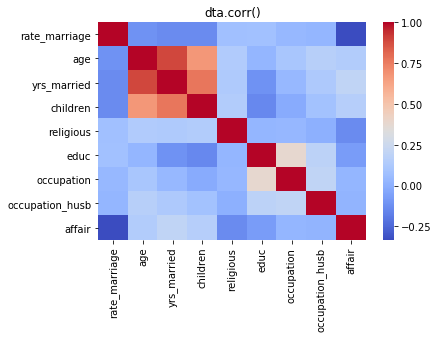

In [35]:
## Correlation plot
import seaborn as sns
sns.heatmap(dta.corr(),cmap='coolwarm')
plt.title('dta.corr()')

#### From heatmap plot looks like age, yrs marriage, no of childrens most affecting

In [36]:
dta.groupby('affair').describe()

rate_marriage                                                  age  \
               count      mean       std  min  25%  50%  75%  max   count   
affair                                                                      
0             4313.0  4.329701  0.821099  1.0  4.0  5.0  5.0  5.0  4313.0   
1             2053.0  3.647345  1.065286  1.0  3.0  4.0  4.0  5.0  2053.0   

                   ... occupation      occupation_husb                      \
             mean  ...        75%  max           count      mean       std   
affair             ...                                                       
0       28.390679  ...        4.0  6.0          4313.0  3.833758  1.361392   
1       30.537019  ...        4.0  6.0          2053.0  3.884559  1.314123   

                                 
        min  25%  50%  75%  max  
affair                           
0       1.0  3.0  4.0  5.0  6.0  
1       1.0  3.0  4.0  5.0  6.0  

[2 rows x 64 columns]

### from above table it looks like max women above 32year & average married years above 8 years are in affairs 

### Data preparation for Logitsic Regression

In [37]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ +\
                  C(occupation) + C(occupation_husb)',dta, return_type="dataframe")


In [38]:
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [39]:
y = np.ravel(y)

### Build Logistic Regression model

In [40]:
# Define ML model & inputs
model = LogisticRegression()
model = model.fit(X,y)

# check the accuracy on the data
model.score(X,y)

C:\Users\JSM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7258875274897895

In [41]:
# What percentage had affair
y.mean()

0.3224945020420987

So 32% of women had affair, which means you always get 68% for women not having affair. Our score of 73% is good.

In [42]:
# Examine co-efficients
X.columns,np.transpose(model.coef_)

(Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
        'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
        'age', 'yrs_married', 'children', 'religious', 'educ'],
       dtype='object'), array([[ 1.48983589],
        [ 0.18806639],
        [ 0.49894787],
        [ 0.25066856],
        [ 0.83900806],
        [ 0.83390843],
        [ 0.19063594],
        [ 0.29783271],
        [ 0.16140885],
        [ 0.18777091],
        [ 0.19401637],
        [-0.70312336],
        [-0.05841777],
        [ 0.10567654],
        [ 0.01691927],
        [-0.37113627],
        [ 0.0040165 ]]))

Increases in marriage rating & religiousness correspond to a decrease in the likelihood of having an affair.

### Model Evaluation Using Validation set
So far we use same data set for train & test set. Here we will use Confusion matrix as Evaluation technique

In [43]:
##################### split the data into train and test set #################
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = .3,random_state=0)
model2 = LogisticRegression()
model2.fit(x_train, y_train)

C:\Users\JSM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
predictions = model2.predict(x_val)
predictions

array([1., 0., 0., ..., 0., 0., 0.])

In [45]:
# Generate probabilities
prob = model.predict_proba(x_val)
prob

array([[0.34304301, 0.65695699],
       [0.90808777, 0.09191223],
       [0.7384556 , 0.2615444 ],
       ...,
       [0.58000259, 0.41999741],
       [0.82206596, 0.17793404],
       [0.75523253, 0.24476747]])

In [46]:
# Confusion matrix
print(metrics.classification_report(y_val,predictions))

              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82      1303
         1.0       0.63      0.37      0.47       607

    accuracy                           0.73      1910
   macro avg       0.69      0.63      0.64      1910
weighted avg       0.71      0.73      0.71      1910



In [47]:
# generate evaluation metrics
print(metrics.accuracy_score(y_val, predictions))
print(metrics.roc_auc_score(y_val, prob[:,1]))

0.7298429319371728
0.7492935451201826


The accuracy is 73%, which is the same as we experienced when training and predicting on the same data.
We also saw the confusion matrix and a classification report gives value >70%.

### Testing Model

In [48]:
X.columns

Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
       'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
       'age', 'yrs_married', 'children', 'religious', 'educ'],
      dtype='object')

In [49]:
model.predict_proba(np.array([[1, 0, 0, 1, 0, 0,1, 0, 0, 0, 0, 3, 25, 3, 1, 4, 16]]))

array([[0.77472221, 0.22527779]])

The predicted probability of an affair is 23%

## 2.4. Problem Statement: Machine Learning 4
Predicting Survival in the Titanic Data Set We will be using "a decision tree" to make predictions about the Titanic data
set from Kaggle. This data set provides information on the Titanic
passengers and can be used to predict whether a passenger survived or
not.

Loading Data and modules

In [50]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
Url="https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

In [51]:
titanic = pd.read_csv(Url)
titanic.columns =['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','E mbarked']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,E mbarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data pre-processing

In [20]:
# Feature selection based on given in problem statement below
#You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare to predict whether a passenger survived.

In [52]:
titdata = titanic.loc[:,['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']]
titdata.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250


In [53]:
# Check if any null values
titdata.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

#### There are missing data on Age data, from selected features

In [54]:
titdata.size

6237

In [55]:
# Filling missing data, here data is numeric so we can fill with 0 as there are not much missing values
titdata.fillna(0, inplace=True)
titdata.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [56]:
# Function from sklearn preprocessing will handle non-numeric data
le = preprocessing.LabelEncoder()

In [57]:
titdata['Sex'] = le.fit_transform(titdata['Sex'])
titdata.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250


In [58]:
#import pydotplus
from IPython.display import Image, display

In [59]:
# select features
y = titdata['Survived']
X = titdata[['Pclass','Sex','Age','SibSp','Parch','Fare']] #features 'Pclass','Sex','Age','SibSp','Parch','Fare'

In [60]:
# split data randomly into 70% training and 30% test
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

### Train the model and make predictions

In [61]:
# train the decision tree
from sklearn import tree
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [62]:
# use the model to make predictions with the test data
y_pred = dtree.predict(X_test)

### Evaluate the model's performance

Including the tree's axis-parallel decision boundaries and how the tree splits


In [63]:
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 51
Accuracy: 0.81


### Cross Validation score

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
scores = cross_val_score(estimator= dtree,     # Model to test
                X= X,  
                y = y,      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=10)                              # Cross validation folds

print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[0.81111111 0.81111111 0.78651685 0.83146067 0.82022472 0.78651685
 0.79775281 0.78651685 0.83146067 0.79545455]
Average accuracy:  0.8058126205879015


## 2.5. Problem Statement: Machine Learning 5
In this assignment students will build "the random forest model" after
normalizing the variable to house pricing from boston data set.

Following the code to get data into the environment:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor


In [2]:
boston = datasets.load_boston()
features = pd.DataFrame(boston.data,columns=boston.feature_names)
targets = boston.target

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
X.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [7]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


## Data pre-processing

In [9]:
# Check if missing or null data
X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

There are no missing or null data in dataset

## Applying the Random Forest classifier model

# Instructions

- Fit both clf and clf2 to the data.
- Use train[features columns] as the predictors, and train[target] as the target.
- Make predictions on the test set predictors (test[columns]) using both clf and clf2.
- For both sets of predictions, compute the AUC between the predictions and the actual values (test[target]) 
   using the roc_auc_score function.
- Use the print function to display the AUC values for both.

In [10]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.3, random_state=0)

clf = DecisionTreeRegressor(random_state=1, min_samples_leaf=2)
clf.fit(X_train, Y_train)

clf2 = DecisionTreeRegressor(random_state=1, max_depth=5)
clf2.fit(X_train, Y_train)

print(clf.score(X_test, Y_test))
print(clf2.score(X_test, Y_test))

0.6642626437828847
0.6730422237584595


### Combining our predictions

In [12]:
# The above things can be applied with following codes

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor

rfc1 = RandomForestRegressor(random_state=1) #max_features=10, RandomForestClassifier
rfc1.fit(X_train,Y_train)


C:\Users\JSM\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [13]:
rfc2 = RandomForestRegressor(max_features=8, random_state=10)
rfc2.fit(X_train, Y_train)
pred1 = rfc1.predict(X_test)
pred2 = rfc2.predict(X_test)

C:\Users\JSM\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [14]:
print('Variance score: %f' % r2_score(Y_test, pred1))
print('Variance score: %f' % r2_score(Y_test, pred2))

Variance score: 0.773453
Variance score: 0.818265


In [15]:
#? RandomForestClassifier, get help on RandomForestClassifier
print(rfc1.feature_importances_)

[3.26867257e-02 6.65358067e-04 1.08323324e-02 5.65623459e-04
 1.52650820e-02 1.97018441e-01 3.50154421e-02 3.66330549e-02
 9.98452209e-03 1.52778278e-02 1.23188352e-02 8.46124420e-03
 6.25275511e-01]


In [16]:
print(rfc2.feature_importances_)

[0.01197948 0.00354338 0.06789503 0.00274578 0.02034913 0.4152825
 0.02044647 0.09308789 0.00968417 0.02524316 0.01725675 0.00776426
 0.304722  ]


## 2.6. Problem Statement: Machine Learning 6
In this assignment students need to predict whether a person makes over
50K per year or not from classic adult dataset using XGBoost. The
description of the dataset is as follows:

Data Set Information:
Extraction was done by Barry Becker from the 1994 Census
database. A set of reasonably clean records was extracted using the
following conditions: ((AAGE>16) && (AGI>100) &&
(AFNLWGT>1)&& (HRSWK>0))

Attribute Information:
Listing of attributes: >50K, <=50K.

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov,
Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school,
Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th,
Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married,
Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Execmanagerial,
Prof-specialty, Handlers-cleaners, Machine-op-inspct,
Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv,
Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative,
Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico,
Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan,
Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy,
Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,
Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia,
Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-
Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

Following is the code to load required libraries and data:

In [18]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_svmlight_files
from sklearn.metrics import accuracy_score
from xgboost.sklearn import XGBClassifier
import xgboost as xgb


In [19]:
train_set = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header = None)
test_set = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test" , skiprows = 1, header = None)
col_labels = ['age', 'workclass', 'fnlwgt', 'education','education_num', 'marital_status', 'occupation','relationship', 'race','sex', 'capital_gain', 'capital_loss', 'hours_per_week','native_country', 'wage_class']

In [20]:
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [21]:
test_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [22]:
train_set.columns = col_labels
test_set.columns = col_labels

In [23]:
train_set.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [24]:
test_set.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.


In [25]:
train_set.shape, test_set.shape

((32561, 15), (16281, 15))

## Data pre-processing

In [26]:
# Find if any null values
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [27]:
test_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [28]:
# Fnd duplicate values
print(train_set.duplicated().any())
print(train_set.duplicated().sum())

True
24


In [29]:
# Drop duplicate values
train_set.drop_duplicates(keep='first', inplace=True)
train_set.shape

(32537, 15)

In [30]:
print(test_set.duplicated().any())
print(test_set.duplicated().sum())

True
5


In [31]:
# Drop duplicate values
test_set.drop_duplicates(keep='first', inplace=True)
test_set.shape

(16276, 15)

In [32]:
train_set['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

### There are '?' in the data need to be replaced with NAN & then we can drop them

In [33]:
train_new = train_set.replace(' ?', np.nan).dropna()
print(train_new.shape)
test_new = test_set.replace(' ?', np.nan).dropna()
print(test_new.shape)

(30139, 15)
(15055, 15)


In [34]:
train_new.wage_class.unique()

array([' <=50K', ' >50K'], dtype=object)

In [35]:
test_new.wage_class.unique()

array([' <=50K.', ' >50K.'], dtype=object)

In [36]:
# Need to replace <=50K. to <=50K & >50K. to >50K on test data set
test_new['wage_class'] = test_new.wage_class.replace({' <=50K.': ' <=50K', ' >50K.':' >50K'})

In [37]:
# Covert binary data to numeric in columns
from sklearn.preprocessing import LabelEncoder

In [38]:
le= LabelEncoder()
for i in train_new.columns:
    if train_new[i].dtype == 'object':
        train_new[i] = le.fit_transform(train_new[i])

In [39]:
train_new.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0


In [40]:
for i in test_new.columns:
    if test_new[i].dtype == 'object':
        test_new[i] = le.fit_transform(test_new[i])
test_new.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,37,1


### Data vusualization

In [41]:
combdata = pd.concat([train_new,test_new],axis=0)

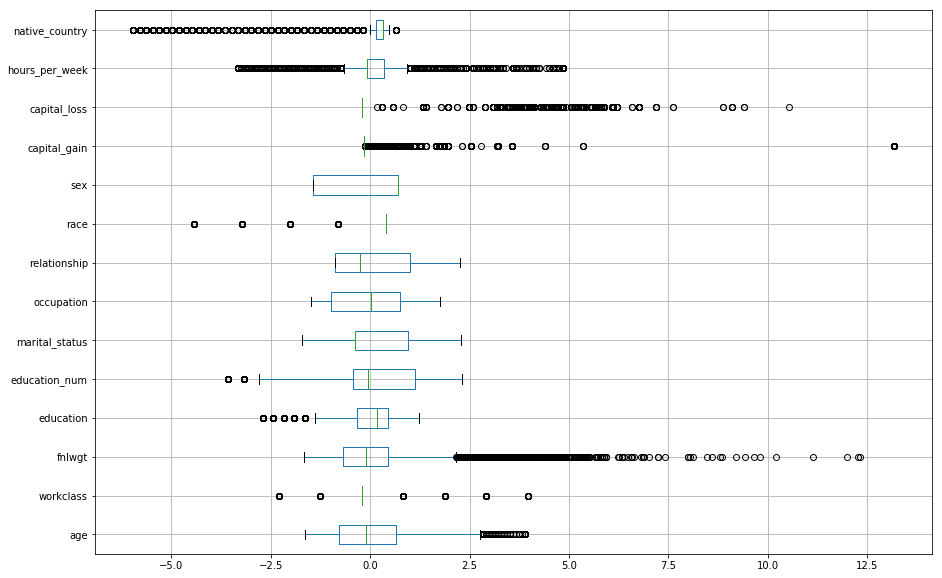

In [42]:
#Outlier check
from sklearn.preprocessing import StandardScaler
x=combdata.drop(['wage_class'],axis=1)
scaler=StandardScaler().fit(x)

y=pd.DataFrame(scaler.transform(x),columns=x.columns)
y.boxplot(vert=False,figsize=(15,10))

In [43]:
combdata.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45194.0,38.551755,13.215806,17.0,28.00,37.0,47.0,90.0
workclass,45194.0,2.204563,0.958362,0.0,2.00,2.0,2.0,6.0
fnlwgt,45194.0,189737.853056,105640.654414,13492.0,117392.25,178312.0,237903.0,1490400.0
education,45194.0,10.313161,3.816837,0.0,9.00,11.0,12.0,15.0
education_num,45194.0,10.119109,2.552057,1.0,9.00,10.0,13.0,16.0
marital_status,45194.0,2.584879,1.500492,0.0,2.00,2.0,4.0,6.0
occupation,45194.0,5.970062,4.026796,0.0,2.00,6.0,9.0,13.0
relationship,45194.0,1.412820,1.597474,0.0,0.00,1.0,3.0,5.0
race,45194.0,3.680201,0.832442,0.0,4.00,4.0,4.0,4.0
sex,45194.0,0.675067,0.468355,0.0,0.00,1.0,1.0,1.0


### XGBoost Model

In [44]:
from matplotlib import pyplot
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import  metrics
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [45]:
# Split data for X & Y on tarin, test case
X_train=train_new.drop(['wage_class'],axis=1)
Y_train=train_new[['wage_class']]
X_test=test_new.drop(['wage_class'],axis=1)
Y_test=test_new[['wage_class']]


In [46]:
XGBClassifier()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [47]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'
# Spot-Check Algorithms
models = []
models.append(('Logistic', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('GB',XGBClassifier()))
models

[('Logistic',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=None, solver='warn', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('CART',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                         max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort=False,
                         random_state=None, splitter='best')),
 ('GB', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, gamma=0,
                learning_rate=0.1, max_delta_step=0, max_depth=3,
            

In [48]:
# evaluate each model in turn
num_folds = 10
seed = 7
scoring = 'accuracy'
results = []
names = []
model_comp=pd.DataFrame(columns=['Model','Test Accuracy','Std.Dev'])

for name, model in models:
    
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    model_comp=model_comp.append([{'Model':name, 'Test Accuracy':cv_results.mean(), 'Std.Dev':cv_results.std()}],ignore_index=True)
    
model_comp

,Model,Test Accuracy,Std.Dev
0,Logistic,0.787419,0.004923
1,CART,0.802947,0.007347
2,GB,0.859783,0.005644


Parameter Tuning

1.max_depth parameter:- It represents the depth of each tree, 
which is the maximum number of different 
features used in each tree. 

2.learning_rate: usually between 0.1 and 0.01.
If you’re focused on performance
and have time in front of you, decrease incrementally the learning rate 
while increasing the number of trees.

3.subsample, which is for each tree the % of rows taken to build
the tree. 
I recommend not taking out too many rows, as performance will drop a lot.
Take values from 0.8 to 1.

4.colsample_bytree: number of columns used by each tree. In order to avoid some columns to take too much 
credit for the prediction take out a good proportion of columns.Values from 0.3 to 0.8 
if you have many columns (especially if you did one-hot encoding),
or 0.8 to 1 if you only have a few columns.

5.gamma: usually misunderstood parameter, it acts as a regularization parameter. 

In [49]:
predictors = X_train.columns
predictors

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

In [50]:
def modelfit(alg, train_new, predictors,useTrainCV=True, cv_folds=5):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(train_new[predictors].values, label=Y_train.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
        metrics='auc')
        print(cvresult)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(train_new[predictors], Y_train.values,eval_metric='auc')
        
    #Predict training set:
    train_new_predictions = alg.predict(train_new[predictors])
    train_new_predprob = alg.predict_proba(train_new[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(Y_train.values, train_new_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(Y_train.values, train_new_predprob))
                    

In [51]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=2000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 seed=27)
modelfit(xgb1, X_train, predictors)

      train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0           0.882284       0.002327       0.880852      0.002874
1           0.891560       0.002372       0.889299      0.005824
2           0.895955       0.001936       0.893305      0.006948
3           0.898082       0.002687       0.894989      0.007017
4           0.901277       0.001050       0.898136      0.005714
5           0.903042       0.000989       0.899606      0.005030
6           0.904516       0.001532       0.901429      0.005317
7           0.905523       0.000638       0.902755      0.004788
8           0.906796       0.000808       0.903793      0.004786
9           0.907268       0.000941       0.904236      0.004954
10          0.908118       0.000539       0.905050      0.003895
11          0.909078       0.000364       0.905723      0.004321
12          0.909420       0.000348       0.906074      0.004234
13          0.910343       0.000529       0.906826      0.003775
14          0.910889     

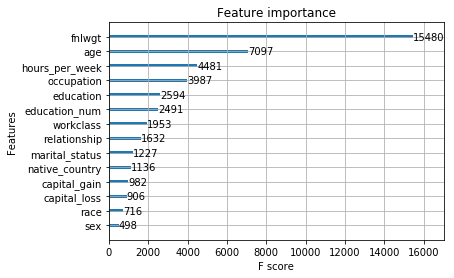

In [52]:
xgb.plot_importance(xgb1)

# Thank you!